<a href="https://colab.research.google.com/github/YasinnSoylu/Autoencoders-AE-/blob/main/Autoencoders_(AE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# MNIST veri setini yükleme ve ölçeklendirme
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [13]:
# Veri boyutunu ayarlama
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Encoder ve decoder için model katmanlarını tanımlama
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Autoencoder modelini tanımlama
autoencoder = Model(input_img, decoded)

# Encoder modelini tanımlama
encoder = Model(input_img, encoded)




In [14]:
# Decoder modelini tanımlama
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Modeli derleme ve eğitim
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
235/235 [==============================] - 2s 4ms/step - loss: 0.2796 - val_loss: 0.1922
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1731 - val_loss: 0.1561
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1462 - val_loss: 0.1351
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1294 - val_loss: 0.1220
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.1188 - val_loss: 0.1136


313/313 [==============================] - 0s 1ms/step


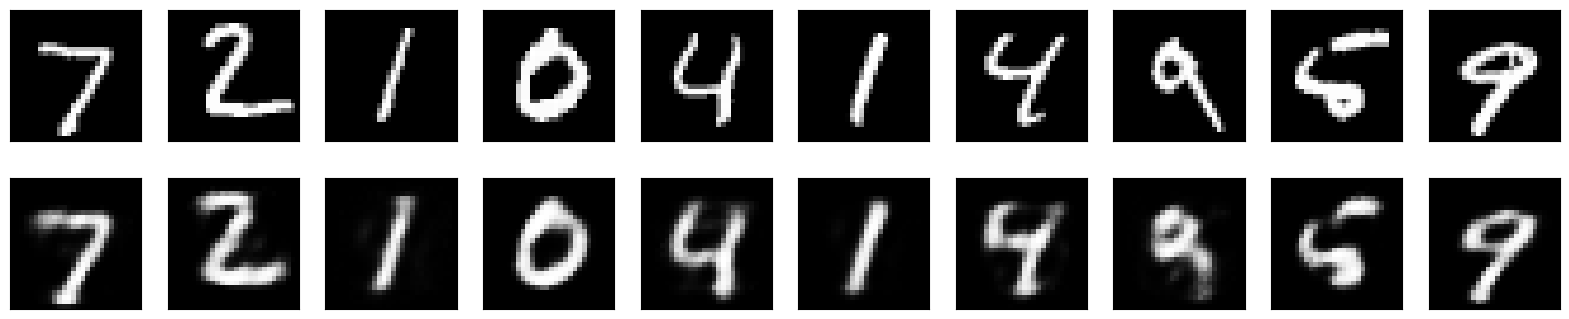

In [15]:
# Test verilerini kodlama ve çözme işleminden geçirme
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Kodlanmış ve çözülmüş resimleri görselleştirme
n = 10  # Görselleştirmek için kaç resim istediğimizi belirtiyoruz
plt.figure(figsize=(20, 4))
for i in range(n):
    # Gerçek resimler
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Çözülmüş resimler
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler

(x_train, _), (x_test, _) = boston_housing.load_data()

# Verileri ölçeklendirme
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [17]:
# Encoder modeli
input_layer = Input(shape=(x_train.shape[1],))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

# Decoder modeli
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(x_train.shape[1], activation='linear')(decoded)

# AE modeli
autoencoder = Model(inputs=input_layer, outputs=decoded)


In [18]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=5, batch_size=32, validation_data=(x_test, x_test))


Epoch 1/5
13/13 [==============================] - 2s 16ms/step - loss: 0.9819 - val_loss: 0.9153
Epoch 2/5
13/13 [==============================] - 0s 6ms/step - loss: 0.8679 - val_loss: 0.7745
Epoch 3/5
13/13 [==============================] - 0s 6ms/step - loss: 0.6763 - val_loss: 0.5576
Epoch 4/5
13/13 [==============================] - 0s 5ms/step - loss: 0.4828 - val_loss: 0.4220
Epoch 5/5
13/13 [==============================] - 0s 7ms/step - loss: 0.3842 - val_loss: 0.3561


In [19]:
encoder = Model(inputs=input_layer, outputs=encoded)
encoded_train = encoder.predict(x_train)
encoded_test = encoder.predict(x_test)


4/4 [==============================] - 0s 2ms/step


<ipython-input-20-8a0f6f8264bb>:4: RuntimeWarning: invalid value encountered in true_divide
  encoded_train_norm = (encoded_train - min_val) / (max_val - min_val)


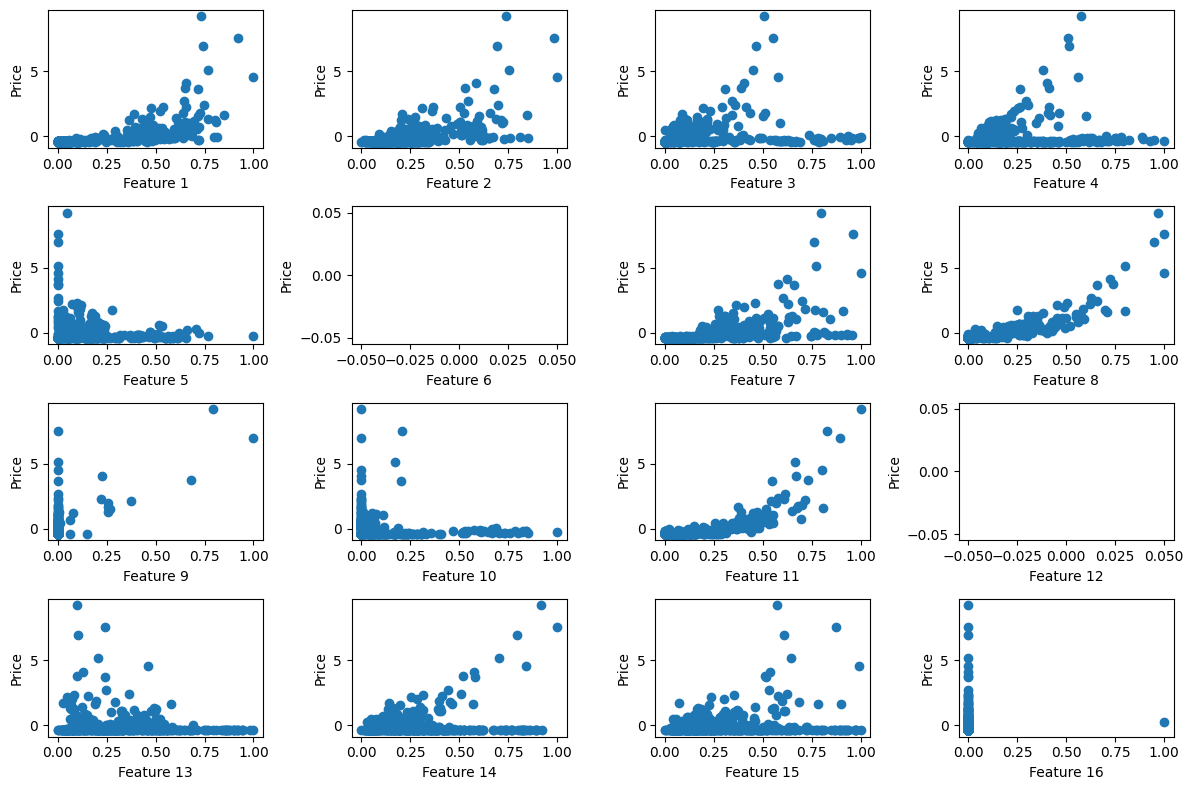

In [20]:
# Verileri yeniden ölçeklendirme (min-max normalization)
min_val = np.min(encoded_train, axis=0)
max_val = np.max(encoded_train, axis=0)
encoded_train_norm = (encoded_train - min_val) / (max_val - min_val)

# Özelliklerin fiyatlarla ilişkisini gösteren grafik
plt.figure(figsize=(12, 8))
for i in range(encoded_train_norm.shape[1]):
    plt.subplot(4, 4, i + 1)
    plt.scatter(encoded_train_norm[:, i], x_train[:, 0])
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Price')
plt.tight_layout()
plt.show()


In [21]:
import numpy as np
from sklearn.datasets import fetch_lfw_people

# LFW veri setini yükleme
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Verileri ölçeklendirme
X = lfw_people.data / 255.0

# Veri setini eğitim ve test verisi olarak ayırma
X_train = X[:1000]
X_test = X[1000:]


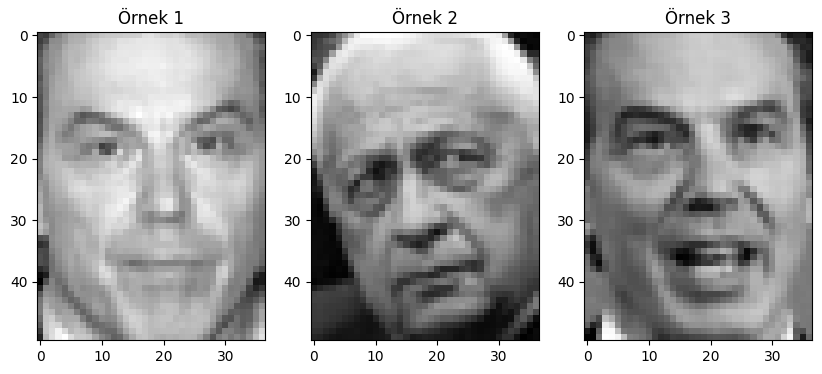

In [22]:
import matplotlib.pyplot as plt

# Rastgele 3 örnek yüz görüntüsü seçme
samples = X_train[np.random.choice(X_train.shape[0], size=3, replace=False)]

# Görüntüleri gösterme
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
for i, ax in enumerate(axes):
    ax.imshow(samples[i].reshape(50, 37), cmap='gray')
    ax.set_title("Örnek {}".format(i+1))
plt.show()


In [23]:
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

# AE modeli oluşturma
input_shape = X_train.shape[1:]
input_data = Input(shape=input_shape)
flatten = Flatten()(input_data)
encoded = Dense(128, activation='relu')(flatten)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(np.prod(input_shape), activation='sigmoid')(decoded)
output_data = Reshape(input_shape)(decoded)

autoencoder = Model(input_data, output_data)
autoencoder.compile(optimizer='adam', loss='mse')

# AE modeli eğitme
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True)


Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.2262
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1811e-06
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2685e-06
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2709e-06
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2707e-06
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2704e-06
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2701e-06
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2697e-06
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2693e-06
Epoch 11/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2689e-06
Epoch 12/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2685e-

In [24]:
# Görüntü boyutlarını alma
input_shape = lfw_people.images.shape[1:]

# Test verilerinin yeniden boyutlandırılması
X_test = X_test.reshape(-1, *input_shape)


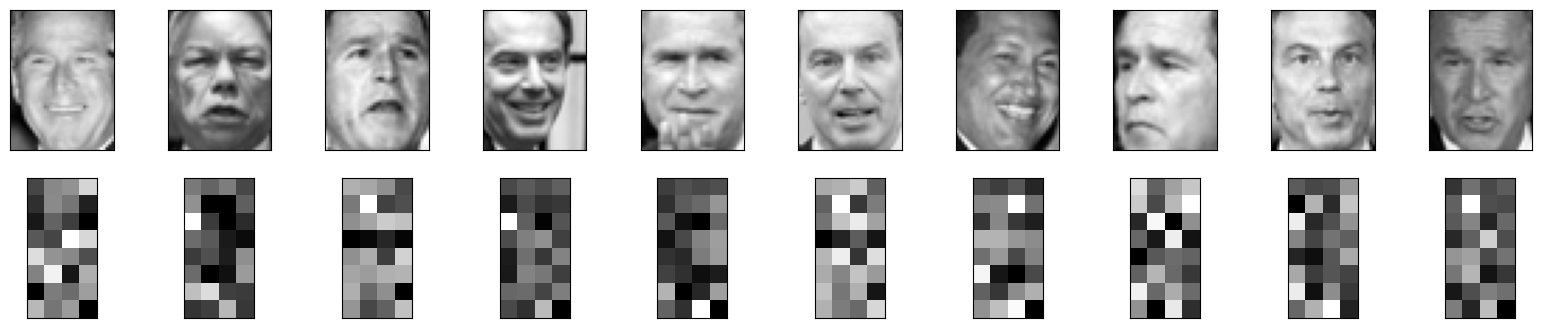

In [25]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(input_shape))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape((8, 4)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
